# Global Power Plant Database



In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Global_Powerplants.csv')

In [4]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [6]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [8]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [9]:
df.shape

(907, 27)

In [10]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [11]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [12]:
df.country.value_counts().sort_values()


IND    907
Name: country, dtype: int64

In [13]:
df.country_long.value_counts().sort_values()

India    907
Name: country_long, dtype: int64

# Since both columns contain same data abd there is no missing values we can drop one column .

In [14]:
df.drop('country_long',axis='columns',inplace=True)

In [15]:
df.columns

Index(['country', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'generation_data_source', 'estimated_generation_gwh'],
      dtype='object')

In [16]:
df.name.value_counts().sort_values()

ACME Solar Tower                1
Anabura Wind Farm               1
ANDHRA                          1
AES Saurashtra Windfarms        1
AGARTALA GT                     1
                               ..
YERMARUS TPP                    1
Yelesandra Solar Power Plant    1
Yelisirur wind power project    1
UPL Dharapuram Wind Farm        1
iEnergy Theni Wind Farm         1
Name: name, Length: 907, dtype: int64

# We get length 907 and each data count once , so we say that there are  unique names of power plant

In [17]:
df.gppd_idnr.value_counts().sort_values()

WRI1020239    1
WRI1026069    1
IND0000011    1
WRI1026669    1
IND0000001    1
             ..
IND0000513    1
WRI1026222    1
WRI1026776    1
WRI1026759    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [18]:
df.primary_fuel.value_counts().sort_values()

Nuclear      9
Oil         20
Biomass     50
Gas         69
Wind       123
Solar      127
Hydro      251
Coal       258
Name: primary_fuel, dtype: int64

In [19]:
df.commissioning_year.value_counts().sort_values()

1953.0     1
1943.0     1
1927.0     1
1939.0     1
1969.0     1
          ..
2010.0    18
2016.0    19
2012.0    23
2013.0    25
2015.0    28
Name: commissioning_year, Length: 73, dtype: int64

In [20]:
def plot_hist(variable):
    plt.figure(figsize = (15,8))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

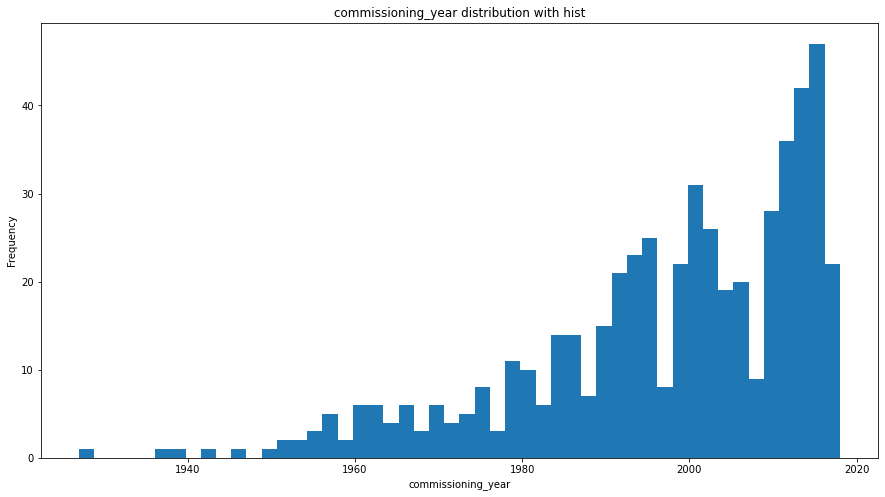

In [21]:
numericVar = ["commissioning_year"]
for n in numericVar:
    plot_hist(n)

In [22]:
df.source.value_counts().sort_values()

Se Pvt Rsolar                                  1
Gupta Ltd gepl)                                1
Manikghar Cement co                            1
Core Fuels ltd                                 1
P3 Green                                       1
                                            ... 
National Thermal Power Corporation (NTPC)      6
National Renewable Energy Laboratory           8
Lancosola                                     10
CDM                                          124
Central Electricity Authority                519
Name: source, Length: 191, dtype: int64

In [23]:
df.estimated_generation_gwh  .value_counts().sort_values()

Series([], Name: estimated_generation_gwh, dtype: int64)

In [24]:
df.drop('estimated_generation_gwh',axis='columns',inplace=True)

In [25]:
df.generation_gwh_2013.value_counts().sort_values()

Series([], Name: generation_gwh_2013, dtype: int64)

In [26]:
df.drop('generation_gwh_2013',axis='columns',inplace=True)

In [27]:
df.generation_gwh_2019  .value_counts().sort_values()

Series([], Name: generation_gwh_2019, dtype: int64)

In [28]:
df.drop('generation_gwh_2019',axis='columns',inplace=True)

In [29]:
df.other_fuel3  .value_counts().sort_values()

Series([], Name: other_fuel3, dtype: int64)

In [30]:
df.drop('other_fuel3',axis='columns',inplace=True)

In [31]:
df.columns

Index(['country', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'commissioning_year',
       'owner', 'source', 'url', 'geolocation_source', 'wepp_id',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [32]:
df.geolocation_source .value_counts().sort_values()

National Renewable Energy Laboratory      4
Industry About                          119
WRI                                     765
Name: geolocation_source, dtype: int64

In [33]:
df['geolocation_source'] = df['geolocation_source'].fillna(0)

In [34]:
df.wepp_id .value_counts().sort_values()

Series([], Name: wepp_id, dtype: int64)

In [35]:
df.drop('wepp_id',axis='columns',inplace=True)

In [36]:
df.year_of_capacity_data.value_counts().sort_values()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [37]:
df['year_of_capacity_data'] = df['generation_gwh_2014'].fillna(0)

In [38]:
df.generation_gwh_2014.value_counts().sort_values()

5521.90000     1
674.39110      1
480.59495      1
1887.90400     1
1920.97100     1
              ..
519.85765      1
730.80760      1
2682.94785     1
3429.30000     1
0.00000       28
Name: generation_gwh_2014, Length: 371, dtype: int64

In [39]:
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(0)

In [40]:
df.generation_gwh_2014.value_counts().sort_values()

473.91000       1
1153.42100      1
157.55825       1
674.39110       1
480.59495       1
             ... 
184.45310       1
519.85765       1
730.80760       1
8197.97000      1
0.00000       537
Name: generation_gwh_2014, Length: 371, dtype: int64

In [41]:
df.generation_gwh_2015.value_counts().sort_values()

692.87820      1
721.33520      1
144.43420      1
1643.04600     1
5629.66300     1
              ..
3709.55220     1
257.05825      1
3573.40320     1
1751.63780     1
0.00000       27
Name: generation_gwh_2015, Length: 396, dtype: int64

In [42]:
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(0)

In [43]:
df.generation_gwh_2016.value_counts().sort_values()

1592.92535     1
675.72440      1
402.02975      1
1338.09300     1
1701.00800     1
              ..
551.10065      1
3357.90000     1
1511.00000     2
8470.57000     2
0.00000       30
Name: generation_gwh_2016, Length: 403, dtype: int64

In [44]:
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(0)

In [45]:
df.generation_gwh_2017.value_counts().sort_values()

198.288000      1
439.372100      1
1563.457000     1
4350.558000     1
644.570950      1
               ..
703.335650      1
1736.842150     1
1156.305799     1
170.085300      2
0.000000       32
Name: generation_gwh_2017, Length: 408, dtype: int64

In [46]:
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(0)

In [47]:
df.generation_gwh_2018.value_counts().sort_values()

6857.95000     1
406.37790      1
1487.88000     1
3717.15400     1
425.64110      1
              ..
3039.66118     1
473.95830      1
918.63375      1
2953.55500     1
0.00000       39
Name: generation_gwh_2018, Length: 410, dtype: int64

In [48]:
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(0)

In [49]:
df.generation_data_source.value_counts().sort_values()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [50]:
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(0)

In [51]:
df.columns

Index(['country', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'commissioning_year',
       'owner', 'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

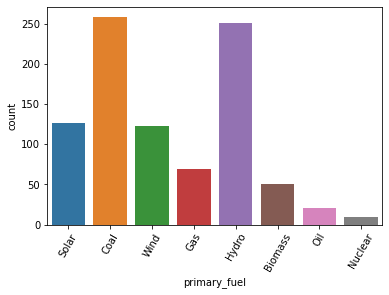

In [52]:
sns.countplot(x="primary_fuel", data = df)
plt.xticks(rotation = 60)
plt.show()

In [53]:
df.other_fuel1.value_counts().sort_values()

Cogeneration      1
Gas               2
Oil             195
Name: other_fuel1, dtype: int64

In [54]:
df['other_fuel1'] = df['other_fuel1'].fillna(0)

In [55]:
df.other_fuel2.value_counts().sort_values()

Oil    1
Name: other_fuel2, dtype: int64

In [56]:
df['other_fuel2'] = df['other_fuel2'].fillna(0)

In [57]:
df['commissioning_year'] = df['commissioning_year'].fillna(0)

In [58]:
df.generation_data_source.value_counts().sort_values()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [59]:
df['generation_data_source'] = df['generation_data_source'].fillna(0)

In [60]:
df.url.value_counts().sort_values()

https://cdm.unfccc.int/Projects/DB/RWTUV1285157251.43/view                            1
http://www.hindustanpowerprojects.com/                                                1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1328700673.83/view                          1
http://www.idealenergysolar.com/                                                      1
https://cdm.unfccc.int/Projects/DB/PJR%20CDM1328594375.93/view                        1
                                                                                   ... 
http://www.acclimited.com/                                                            4
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.ntpc.co.in                                                                 6
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.cea.nic.in/                                                              519
Name: url, Length: 304, dtype: i

In [61]:
df['url'] = df['url'].fillna(0)

In [62]:
df['owner'] = df['owner'].fillna(0)

In [63]:
df['latitude'] = df['latitude'].fillna(0)

In [64]:
df['longitude'] = df['longitude'].fillna(0)

In [65]:
df

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,0,0,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,0,0,0.0,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,0,0,0.0,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,0,0,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,0,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,0,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,0.000000,0.000000,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,0,0,0.0,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,0,0,0.0,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,0,0,0.0,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [66]:
df.columns

Index(['country', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'commissioning_year',
       'owner', 'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [67]:
df.shape

(907, 21)

In [68]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,20.122831,73.536147,1160.382580,1067.106713,1067.106713,1129.781446,1180.909147,1235.958207,1284.630911
std,590.085456,7.655960,17.674358,985.973139,2926.078576,2926.078576,3105.552487,3131.100641,3187.208175,3298.251107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.172050,73.811550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.200000,21.281800,76.493800,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,385.250000,25.176450,79.206100,2003.000000,556.562750,556.562750,598.926350,670.039394,709.290725,687.754000
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [69]:
df.primary_fuel  .value_counts().sort_values()

Nuclear      9
Oil         20
Biomass     50
Gas         69
Wind       123
Solar      127
Hydro      251
Coal       258
Name: primary_fuel, dtype: int64

In [70]:
def tran_primary_fuel(x):
    if x == 'Nuclear':
        return 1
    if x == 'Oil':
        return 2
    if x == 'Biomass':
        return 3
    if x == 'Gas':
        return 4
    if x == 'Wind':
        return 5
    if x == 'Solar':
        return 6
    if x =='Hydro':
        return 7
    if x =='Coal':
        return 8

In [71]:
df['primary_fuel']=df['primary_fuel'].apply(tran_primary_fuel)

In [72]:
last_column = df.pop('primary_fuel')

In [73]:
df.insert(20, 'primary_fuel', last_column)

In [74]:
df.head()

,country,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,commissioning_year,owner,...,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,primary_fuel
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,0,0,2011.0,Solar Paces,...,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,6
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,0,0,0.0,Ultratech Cement ltd,...,http://www.ultratechcement.com/,WRI,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,8
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,0,0,0.0,AES,...,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,5
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,0,0,2004.0,0,...,http://www.cea.nic.in/,WRI,617.789264,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority,4
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Oil,0,2015.0,0,...,http://www.cea.nic.in/,WRI,3035.550000,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority,8


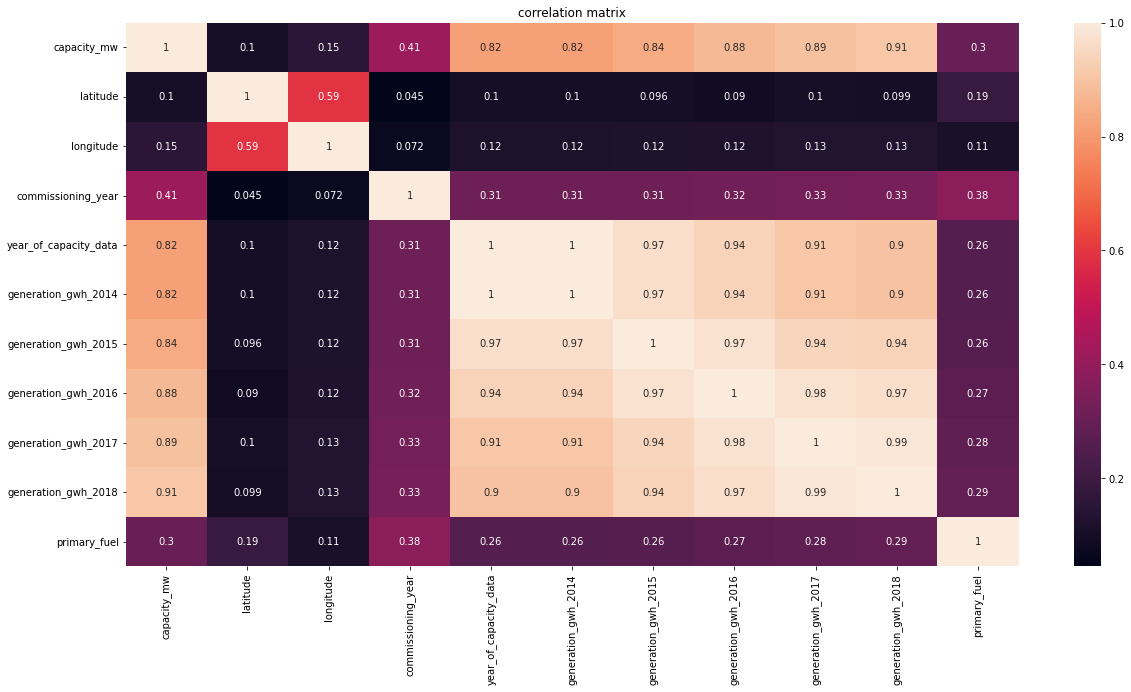

In [75]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(),annot=True)
plt.title('correlation matrix')
plt.show()

In [76]:
x=df[['capacity_mw', 'latitude', 'longitude',
       'commissioning_year','year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', ]]
y=df['primary_fuel']

In [77]:
x.dtypes

capacity_mw              float64
latitude                 float64
longitude                float64
commissioning_year       float64
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

In [78]:
x.skew()

capacity_mw              3.123576
latitude                -0.730074
longitude               -3.581827
commissioning_year      -0.328505
year_of_capacity_data    4.986588
generation_gwh_2014      4.986588
generation_gwh_2015      5.260778
generation_gwh_2016      4.984874
generation_gwh_2017      4.979870
generation_gwh_2018      4.846091
dtype: float64

In [79]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [80]:
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [81]:
encoder=LabelEncoder()

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

maxAccu=0
maxRS=0
for i in range(1,1599):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print('Best accuracy is ',maxAccu,'on random_state',maxRS)

Best accuracy is  0.6648351648351648 on random_state 1047


# Simple Logistic Regression

In [83]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log_train = round(logreg.score(x_train, y_train)*100,2) 
acc_log_test = round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 55.45
Testing Accuracy: % 54.4


# Hyperparameter Tuning -- Grid Search -- Cross Validation

In [84]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [85]:
random_state = 854
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [86]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.6757420091324201
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.5848173515981735
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.7806887366818874
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.5462519025875191
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7129566210045661


Text(0.5, 1.0, 'Cross Validation Scores')

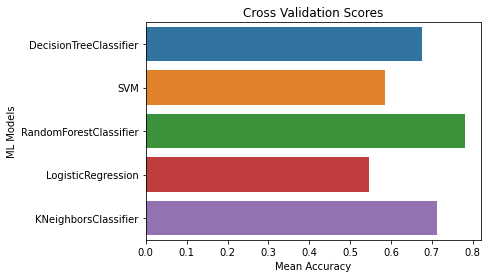

In [87]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Ensemble Modeling

In [88]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_test),y_test))

0.7527472527472527


# XgBoost Regressor

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [90]:
print(x.shape,x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(907, 10) (725, 10) (182, 10)
(725,) (182,)


In [91]:
regressor=XGBRegressor()

In [92]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [93]:
#prediction on training data
training_data_prediction=regressor.predict(x_train)

In [94]:
# R squared value
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [95]:
print('R squared value =' ,r2_train)

R squared value = 0.9980643635981038


In [96]:
#prediction on testing data
testing_data_prediction=regressor.predict(x_test)

In [97]:
# R squared value
r2_test=metrics.r2_score(y_test,testing_data_prediction)

In [98]:
print('R squared value =' ,r2_test)

R squared value = 0.4813733462924379


# CAPACITY_MW (LINEAR REGRESSION)

In [99]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [100]:
x1=df[['primary_fuel', 'latitude', 'longitude',
       'commissioning_year','year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', ]]
y1=df['capacity_mw']

In [101]:
x1_train,x2_test,y1_train,y2_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [102]:
df.capacity_mw.value_counts().sort_values()

132.00      1
33.75       1
990.00      1
829.78      1
1820.00     1
           ..
1200.00    19
15.00      20
600.00     20
10.00      22
5.00       39
Name: capacity_mw, Length: 361, dtype: int64

In [103]:
df['capacity_mw'] = df['capacity_mw'].fillna(0)

In [104]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [105]:
lm=LinearRegression()

In [106]:
#model is getting trained
lm.fit(x1,y1)

LinearRegression()

In [107]:
lm.coef_

array([ 1.27296613, -0.60186526,  1.19442633,  0.07354874,  0.00943148,
        0.00943148, -0.04152713,  0.03137019, -0.02524593,  0.17088052])

In [108]:
lm.intercept_

-41.37822988128528

In [109]:
y_pred=lm.predict(x2_test)
y_pred

array([ 270.45742874, 1001.18759029, 2794.99740016, 3926.47119892,
        211.03664759,  275.83103195,  462.37170285,  369.53693661,
        413.66675323, 3192.38416518,  831.00776126,   34.63623782,
        938.09979907,   62.27537116, 4957.38772126,   77.95758268,
        804.59029198,  401.85001219,   57.15636541, 1002.3899106 ,
       2595.72973876,  325.88890796,   30.49403978,  452.70375293,
        646.77876389,  268.92754157,  346.06917383, 1398.41078017,
       1301.94879505,  186.24883049,  163.40678191,  204.75550272,
         48.33126896,  110.46704469,  699.36131675, 2320.17831085,
        439.46946223, 2870.45555807, 2636.99014526,   31.49938418,
         39.70170787,  695.43982793,  302.90942041, 2356.12412911,
         57.13847187,  170.39724232,   35.2044887 ,   72.98517906,
       1240.22881295,  638.81973841, 1280.88681771,   69.77292881,
         49.48865647,  197.36308003,   72.59323048, 1129.06152708,
        263.94269465,   34.74616202,   62.59837027,   71.28320

In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [111]:
r_squared = r2_score(y2_test, y_pred)
r_squared

-1011308.4323696962